In [4]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../waq')

import numpy as np
import pandas as pd
import geopandas as gp
from matplotlib import mlab
import matplotlib.pyplot as plt

import utils as u
import aq_model
import plotting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# -- Read NYC geometry
nybb_path = gp.datasets.get_path('nybb')
boros = gp.GeoDataFrame.from_file(nybb_path)

In [7]:
aq = u.read_aq('../../../Data/NYC_AQ/*.csv')
aq = aq['2015':]
aq_avg = aq.mean(axis=1)

In [6]:
boilers = gp.read_file('../data/boiler_count_1km/boiler_count_1km.shp')

From the [paper](https://www.researchgate.net/profile/Jane_Clougherty/publication/235382776_Intra-Urban_Spatial_Variability_in_Wintertime_Street-Level_Concentrations_of_Multiple_Combustion-Related_Air_Pollutants_The_New_York_City_Community_Air_Survey_Nyccas/links/5473a83c0cf2778985abb8f6/Intra-Urban-Spatial-Variability-in-Wintertime-Street-Level-Concentrations-of-Multiple-Combustion-Related-Air-Pollutants-The-New-York-City-Community-Air-Survey-Nyccas.pdf)

In [47]:
stations = u.read_stations_coords()

In [57]:
stations = stations[stations['site_name'].isin(aq.columns)]

In [261]:
def calc_aq(point, stations, aq):
    x1 = aq_model.calc_mean_pm25(point, stations, aq, time=10)
    pm25 = aq_model.calc_pm25(x1, point[0])
    return pm25

In [262]:
pm = boilers.apply(lambda x: calc_aq(x, stations, aq), axis=1)

In [251]:
x = boilers['geometry'].x
y = boilers['geometry'].y

In [253]:
bounds = boilers.bounds.agg({'minx':np.min, 'miny':np.min, 'maxx': np.max, 'maxy':np.max})

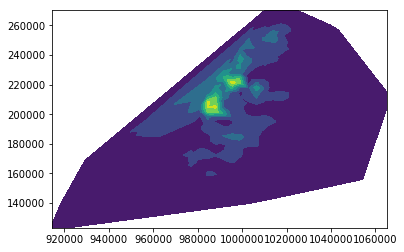

In [263]:
plotting.plot_contour(x,y,pm, bounds, n=2000, s=0.3)